<a href="https://colab.research.google.com/github/VivekRedD1999/Feature-Engineering/blob/main/Missing%20Values%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**2) Random Sample Imputation**


Aim: RSI consists of taking random observation from the dataset, we use this observation to fill NaN values in that dataset.

When should it be used? When the data are missing completly at random (MCAR).


In [ ]:
from google.colab import files
upload = files.upload()

Saving train.csv to train.csv


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("train.csv", usecols = ["Age", "Fare", "Survived"])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [ ]:
df.Age.isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [ ]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [ ]:
df["Age"].dropna().sample(df.Age.isnull().sum(), random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [ ]:
def Impute_nan(df, feature, median):
  df[feature+"_median"] = df[feature].fillna(median)
  df[feature+"_random"] = df[feature]
  ## it performs random sample to fill the NaN values.
  random_sample = df[feature].dropna().sample(df[feature].isnull().sum(), random_state=0)
  ## pandas need to have same dataset inorder to merge the dataset.
  random_sample.index = df[df[feature].isnull()].index
  df.loc[df[feature].isnull(), feature+"_random"] = random_sample

In [ ]:
median = df.Age.median()
Impute_nan(df,"Age",median)

In [ ]:
df

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0
...,...,...,...,...,...
886,0,27.0,13.0000,27.0,27.0
887,1,19.0,30.0000,19.0,19.0
888,0,NaN,23.4500,28.0,15.0
889,1,26.0,30.0000,26.0,26.0


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

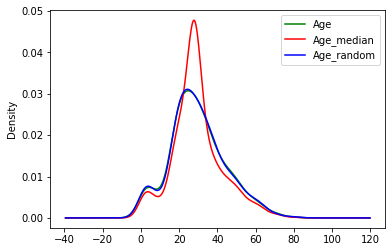

In [ ]:
fig = plt.figure() 
ax = fig.add_subplot(111) 
df.Age.plot(kind='kde', ax=ax, color = 'green') 
df.Age_median.plot(kind='kde', ax=ax, color='red') 
df.Age_random.plot(kind='kde', ax=ax, color='blue')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc = 'best')

**Advantages**


1) Easy to Implement.

2) Less Distortion in variance.

**Disadvantages**

1) Randomness doesn't work in some situations.

2) Impacts Correlation.

**Capturing NaN Values with a New Feature**

It worls well when the data are not missing completly at random



In [ ]:
df = pd.read_csv('train.csv', usecols=['Age', 'Survived', 'Fare'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [ ]:
df['Age_NaN']=np.where(df.Age.isnull(),1,0)
df.head(10)

,Survived,Age,Fare,Age_NaN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,NaN,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


In [ ]:
df['Age'].fillna(df.Age.median(), inplace = True)
df.head(10)

,Survived,Age,Fare,Age_NaN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


**Advantages**

1) Easy to implement.

2) Captures the importance of missing data.

**Disadvantages**

1) Creating additional feature, may cause *curse of dimensionality*.

**4) End of Distribution Imputation**



In [ ]:
df = pd.read_csv('train.csv', usecols=['Age', 'Survived', 'Fare'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


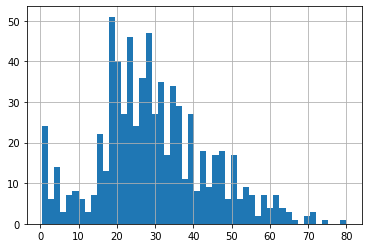

In [ ]:
df.Age.hist(bins=50)

In [ ]:
extreme = df.Age.mean() + 3*df.Age.std()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


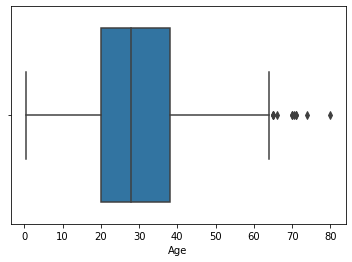

In [ ]:
import seaborn as sns
sns.boxplot('Age', data = df)

In [ ]:

def Impute_Extreme(df,feature,median,extreme):
  df[feature+'_End_Distribution'] = df[feature].fillna(extreme)
  df[feature].fillna(median, inplace = True)

In [ ]:
Impute_Extreme(df,'Age',df.Age.median(),extreme)

In [ ]:
df.head(10)

,Survived,Age,Fare,Age_End_Distribution
0,0,22.0,7.2500,22.00000
1,1,38.0,71.2833,38.00000
2,1,26.0,7.9250,26.00000
3,1,35.0,53.1000,35.00000
4,0,35.0,8.0500,35.00000
5,0,28.0,8.4583,73.27861
6,0,54.0,51.8625,54.00000
7,0,2.0,21.0750,2.00000
8,1,27.0,11.1333,27.00000
9,1,14.0,30.0708,14.00000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


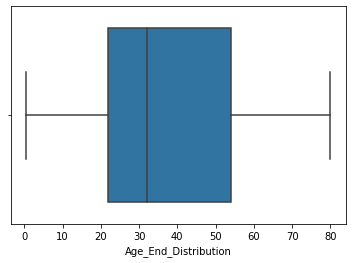

In [ ]:
sns.boxplot('Age_End_Distribution', data = df)

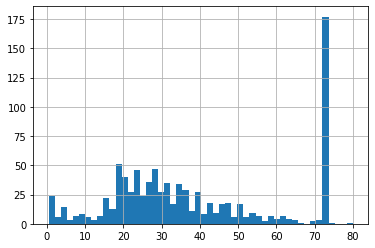

In [ ]:
df.Age_End_Distribution.hist(bins = 50)

**Advantages**

1) Easy to Implement

2) Captures the importance of missingness if there is one

**Disadvantages**

1) Distorts the original distribution of the variable.

2) If missingness is not important, it may mask the predictive power of the original variable by distorting its distribution.

3) If the number of NaN are huge in features, it will mask true outliers in the distribution.

4) If the number of NaN values are less, the replaced NaN may be considered an outlier and pre-processed in a subsequent feature engineering.